In [1]:
import os

path = "data/"

os.chdir(path)

if os.curdir != path:
    print("Error: Could not change directory to " + path)
    exit(1)

if os.curdir == path:
    print("Success: Changed directory to " + path)
    exit(1)
    
print(os.getcwd())

Error: Could not change directory to data/
c:\GitHub\Metabolic-network-layout-using-biochemical-coordinates\Notebooks\data


# NetworkX
## For GEMs 🗺️ & pathways 🛣️

In [36]:
import pandas as pd
# 🛣️Pathways🛣️ #

# Pathway = input("Enter TCA, GTP, CTP, AMP or Histidine") # TCA, GTP, CTP, AMP or Histidine

Pathway = "CTP"

# Set descriptorpairs

# x_coord = "MolLogP"
# y_coord = "NumValenceElectrons"
# x_coord = "mass_rank"
# y_coord = "MolLogP_rank"


# x_coord = "ExactMolWt"
# y_coord = "NumValenceElectrons"
# y_coord = "MolMR"

x_coord = "charge"
y_coord = "MolMR"

# 🛣️Pathways🛣️ #
data2 = pd.read_csv(Pathway + ".csv")



charge_MolMR


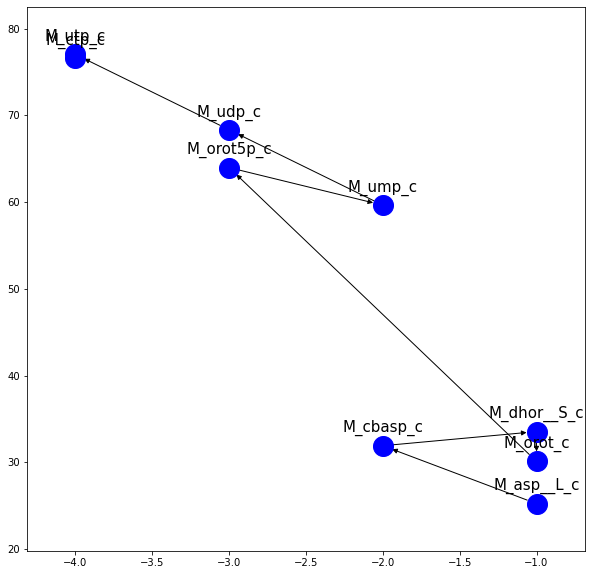

In [44]:
# 🛣️Pathways🛣️ #


# Rename networks as GEMS & pathways dumbass
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

net2 = nx.DiGraph()
net3 = nx.DiGraph()

#### 🗺️ GEM data🗺️ ####
#  🦣  iML1515   🦣  #
#data = pd.read_csv("Chemical_descriptors1515_ranked.csv")
data = pd.read_csv("core.csv")
#
# target = pd.read_csv("iML1515_Metabolic_network_targets.csv")
target = pd.read_csv("core_targets.csv")
#  😈  E coli core   😈  #
# data = pd.read_csv("Chemical_descriptors_e_coli_core_ranked.csv")
# target  = pd.read_csv("Chemical_descriptors_e_coli_core_ranked_targets.csv")
### 🗺️GEM data🗺️ ####



# GEM
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values

DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)

# Pathway 
sources_2 = data2["BiGG"]
targets_2 = data2['target']
coordinates_2 = data2[[x_coord, y_coord]].values



file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)

edge_data_2 = zip(sources_2,targets_2, coordinates_2) # targets

for e in edge_data_2:
    src = e[0]
    dst = e[1]
    c = e[2]

    net3.add_node(src, pos = c, node_color = 'red')
    net3.add_edge(src,dst)




# print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')
pos_net2 = nx.get_node_attributes(net3,'pos')
fig, ax = plt.subplots(figsize=(10,10))

net2.remove_edges_from(nx.selfloop_edges(net2))
net3.remove_edges_from(nx.selfloop_edges(net3))

pos_net2_higher = {}
y_off = 0.0  # offset on the y axis
x_off = 0.0

for k, v in pos_net1.items():
    pos_net2_higher[k] = (v[0]+x_off, v[1]+y_off)


pos_net3_higher = {}
y_off = 2  # offset on the y axis
x_off = 0.0

for k, v in pos_net2.items():
    pos_net3_higher[k] = (v[0]+x_off, v[1]+y_off)


#nx.draw(net2,pos_net1,node_size =10, with_labels = False, arrows = False, ax = ax)
# nx.draw_networkx_labels(net2, pos_net2_higher, font_size =5)

nx.draw(net3,pos_net2,node_color = "b", node_size = 400,font_size = 40, arrows = True, ax = ax)
nx.draw_networkx_labels(net3, pos_net3_higher, font_size =15)

limits=plt.axis('on') # turns on axis
#ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
#ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

print(DescriptorPair)

plt.savefig(f"Plots/{Pathway}/{file_name}.png", format="PNG")
plt.show()


In [47]:
# Rename networks as GEMS & pathways dumbass
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

net2 = nx.DiGraph()
net3 = nx.DiGraph()

#### 🗺️ GEM data🗺️ ####
#  🦣  iML1515   🦣  #
#data = pd.read_csv("Chemical_descriptors1515_ranked.csv")
data = pd.read_csv("core.csv")
#
# target = pd.read_csv("iML1515_Metabolic_network_targets.csv")
target = pd.read_csv("core_targets.csv")
#  😈  E coli core   😈  #
# data = pd.read_csv("Chemical_descriptors_e_coli_core_ranked.csv")
# target  = pd.read_csv("Chemical_descriptors_e_coli_core_ranked_targets.csv")
### 🗺️GEM data🗺️ ####

# 🛣️Pathways🛣️ #

Pathway = input("Enter TCA, GTP, CTP, AMP or Histidine") # TCA, GTP, CTP, AMP or Histidine

# 🛣️Pathways🛣️ #
data2 = pd.read_csv(Pathway + ".csv")

# Set descriptorpairs
x_coord = "PC3"
y_coord = "PC5"


# GEM
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values

DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)

# Pathway 
sources_2 = data2["BiGG"]
targets_2 = data2['target']
coordinates_2 = data2[[x_coord, y_coord]].values



file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)

edge_data_2 = zip(sources_2,targets_2, coordinates_2) # targets

for e in edge_data_2:
    src = e[0]
    dst = e[1]
    c = e[2]

    net3.add_node(src, pos = c, node_color = 'red')
    net3.add_edge(src,dst)




# print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')
pos_net2 = nx.get_node_attributes(net3,'pos')
fig, ax = plt.subplots(figsize=(10,10))

net2.remove_edges_from(nx.selfloop_edges(net2))
net3.remove_edges_from(nx.selfloop_edges(net3))

pos_net2_higher = {}
y_off = 0.0  # offset on the y axis
x_off = 0.0

for k, v in pos_net1.items():
    pos_net2_higher[k] = (v[0]+x_off, v[1]+y_off)


pos_net3_higher = {}
y_off = 0.04  # offset on the y axis
x_off = 0.0

for k, v in pos_net2.items():
    pos_net3_higher[k] = (v[0]+x_off, v[1]+y_off)


#nx.draw(net2,pos_net1,node_size =10, with_labels = False, arrows = False, ax = ax)
# nx.draw_networkx_labels(net2, pos_net2_higher, font_size =5)

nx.draw(net3,pos_net2,node_color = "b", node_size = 400,font_size = 40, with_labels = False, arrows = True, ax = ax)
nx.draw_networkx_labels(net3, pos_net3_higher, font_size =15)

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

print(DescriptorPair)

plt.savefig(f"Plots/{Pathway}/{file_name}.png", format="PNG")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '.csv'

In [ ]:
# Rename networks as GEMS & pathways dumbass
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

net2 = nx.DiGraph()
net3 = nx.DiGraph()

#### 🗺️ GEM data🗺️ ####
#  🦣  iML1515   🦣  #
#data = pd.read_csv("Chemical_descriptors1515_ranked.csv")
data = pd.read_csv("core.csv")
#
# target = pd.read_csv("iML1515_Metabolic_network_targets.csv")
target = pd.read_csv("core_targets.csv")
#  😈  E coli core   😈  #
# data = pd.read_csv("Chemical_descriptors_e_coli_core_ranked.csv")
# target  = pd.read_csv("Chemical_descriptors_e_coli_core_ranked_targets.csv")
### 🗺️GEM data🗺️ ####

# 🛣️Pathways🛣️ #

Pathway = input("Enter TCA, GTP, CTP, AMP or Histidine") # TCA, GTP, CTP, AMP or Histidine

# 🛣️Pathways🛣️ #
data2 = pd.read_csv(Pathway + ".csv")

# Set descriptorpairs
x_coord = "PC1"
y_coord = "PC5"


# GEM
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values

DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)

# Pathway 
sources_2 = data2["BiGG"]
targets_2 = data2['target']
coordinates_2 = data2[[x_coord, y_coord]].values



file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)

edge_data_2 = zip(sources_2,targets_2, coordinates_2) # targets

for e in edge_data_2:
    src = e[0]
    dst = e[1]
    c = e[2]

    net3.add_node(src, pos = c, node_color = 'red')
    net3.add_edge(src,dst)




# print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')
pos_net2 = nx.get_node_attributes(net3,'pos')
fig, ax = plt.subplots(figsize=(10,10))

net2.remove_edges_from(nx.selfloop_edges(net2))
net3.remove_edges_from(nx.selfloop_edges(net3))

pos_net2_higher = {}
y_off = 0.0  # offset on the y axis
x_off = 0.0

for k, v in pos_net1.items():
    pos_net2_higher[k] = (v[0]+x_off, v[1]+y_off)


pos_net3_higher = {}
y_off = 0.2  # offset on the y axis
x_off = 0.0

for k, v in pos_net2.items():
    pos_net3_higher[k] = (v[0]+x_off, v[1]+y_off)


#nx.draw(net2,pos_net1,node_size =10, with_labels = False, arrows = False, ax = ax)
# nx.draw_networkx_labels(net2, pos_net2_higher, font_size =5)

nx.draw(net3,pos_net2,node_color = "b", node_size = 400,font_size = 40, with_labels = False, arrows = True, ax = ax)
# nx.draw_networkx_labels(net3, pos_net3_higher, font_size =15)

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

print(DescriptorPair)

plt.savefig(f"Plots/{Pathway}/{file_name}.png", format="PNG")
plt.show()


In [17]:
nx.info(net3)

C:\Users\meide\AppData\Local\Temp\ipykernel_15584\3080715898.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(net3)


'DiGraph with 16 nodes and 15 edges'

In [ ]:
# Rename networks as GEMS & pathways dumbass
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

net2 = nx.DiGraph()
net3 = nx.DiGraph()

#### 🗺️ GEM data🗺️ ####
#  🦣  iML1515   🦣  #
#data = pd.read_csv("Chemical_descriptors1515_ranked.csv")
data = pd.read_csv("core.csv")
#
# target = pd.read_csv("iML1515_Metabolic_network_targets.csv")
target = pd.read_csv("core_targets.csv")
#  😈  E coli core   😈  #
# data = pd.read_csv("Chemical_descriptors_e_coli_core_ranked.csv")
# target  = pd.read_csv("Chemical_descriptors_e_coli_core_ranked_targets.csv")
### 🗺️GEM data🗺️ ####

# 🛣️Pathways🛣️ #

Pathway = input("Enter TCA, GTP, CTP, AMP or Histidine") # TCA, GTP, CTP, AMP or Histidine

# 🛣️Pathways🛣️ #
data2 = pd.read_csv(Pathway + ".csv")

# Set descriptorpairs
x_coord = "PC1"
y_coord = "PC5"


# GEM
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values

DescriptorPair = "{}_{}".format(x_coord, y_coord)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)

# Pathway 
sources_2 = data2["BiGG"]
targets_2 = data2['target']
coordinates_2 = data2[[x_coord, y_coord]].values



file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)

edge_data_2 = zip(sources_2,targets_2, coordinates_2) # targets

for e in edge_data_2:
    src = e[0]
    dst = e[1]
    c = e[2]

    net3.add_node(src, pos = c, node_color = 'red')
    net3.add_edge(src,dst)




# print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')
pos_net2 = nx.get_node_attributes(net3,'pos')
fig, ax = plt.subplots(figsize=(10,10))

net2.remove_edges_from(nx.selfloop_edges(net2))
net3.remove_edges_from(nx.selfloop_edges(net3))

pos_net2_higher = {}
y_off = 0.0  # offset on the y axis
x_off = 0.0

for k, v in pos_net1.items():
    pos_net2_higher[k] = (v[0]+x_off, v[1]+y_off)


pos_net3_higher = {}
y_off = 0.2  # offset on the y axis
x_off = 0.0

for k, v in pos_net2.items():
    pos_net3_higher[k] = (v[0]+x_off, v[1]+y_off)


#nx.draw(net2,pos_net1,node_size =10, with_labels = False, arrows = False, ax = ax)
# nx.draw_networkx_labels(net2, pos_net2_higher, font_size =5)

nx.draw(net3,pos_net2,node_color = "b", node_size = 400,font_size = 40, with_labels = False, arrows = True, ax = ax)
# nx.draw_networkx_labels(net3, pos_net3_higher, font_size =15)

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord, fontsize = 18)
# ax.xlabel(x_coord, fontsize = 18)
ax.set_ylabel(y_coord, fontsize =18)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

print(DescriptorPair)

plt.savefig(f"Plots/{Pathway}/{file_name}.png", format="PNG")
plt.show()


PLUS ULTRA
mass_charge


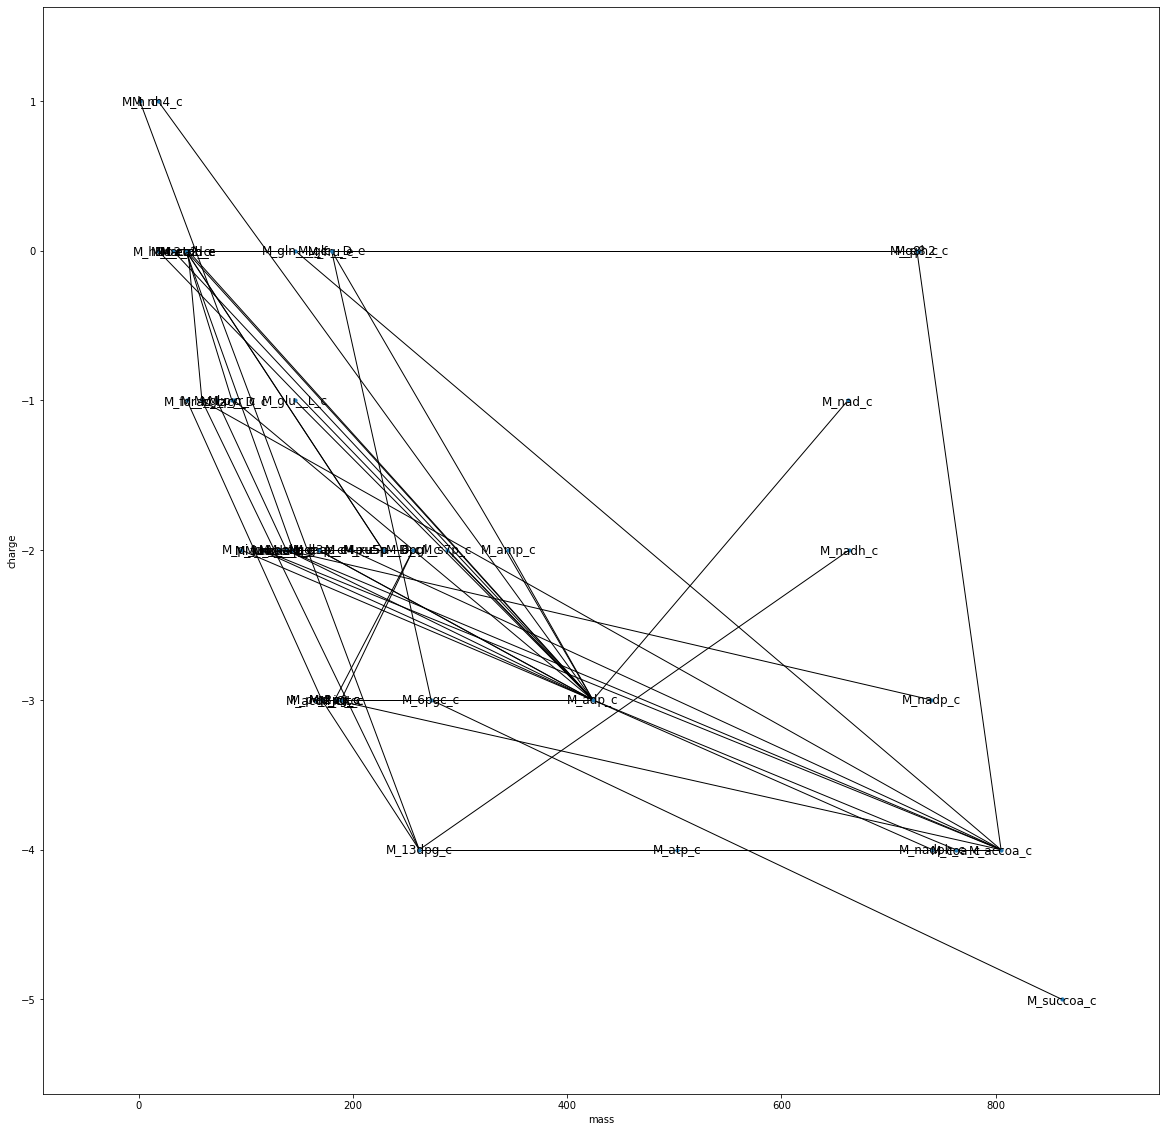

In [5]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

net2 = nx.DiGraph()
net3 = nx.DiGraph()


 
Pathway = input("Enter Core or 1515") # Core or 1515

# 🛣️Pathways🛣️ #
data = pd.read_csv(Pathway + ".csv")




#### 🐲GEM data🐲 ####

#  🦣  iML1515   🦣  #
# data = pd.read_csv("1515.csv")
# data = pd.read_csv("iML1515_PCA.csv")
# target = pd.read_csv("1515_targets.csv")
#  🦣  iML1515   🦣   #


target = pd.read_csv(Pathway +"_targets.csv")


#  😈  E coli core   😈  #
#data = pd.read_csv("core.csv")
#target  = pd.read_csv("core_targets.csv")
#  😈  E coli core   😈  #

### 🐲GEM data🐲 ####

# 🗺️Pathways🗺️ #
    
####🍋 TCA data 🍋####

# Normal #

# data2 = pd.read_csv("TCA.csv")

# Normal #

# Standardized #


# data = pd.read_csv("TCA_target_standardized_ranked.csv")

# Standardized #

####🍋 TCA data 🍋####

####🍔 FAS 🍔####

# Screw you acyl carrier protein

# data2 = pd.read_csv("Palmitate.csv")


####🍔 FAS 🍔####


####🧬 Nucleotides 🧬####
# data2 = pd.read_csv("CTP.csv")
# data2 = pd.read_csv("AMP.csv")
# data2 = pd.read_csv("GTP.csv")
####🧬 Nucleotides 🧬####

####🦠  Amino acids 🦠####
# Only histidine 
# data2 = pd.read_csv("Histidine.csv")

####🦠  Amino acids 🦠####

# 🗺️Pathways🗺️ #

# Set descriptorpairs
x_coord = input("Feature x")
# x_coord = "mass"
y_coord = input("Feature y")


# y_coord = "charge"


# GEM
sources = data["BiGG"]
targets = target['target']
coordinates = data[[x_coord, y_coord]].values

DescriptorPair = "{}_{}".format(x_coord, y_coord)

file_name = "{Pathway} + {DescriptorPair}".format(Pathway = Pathway, DescriptorPair = DescriptorPair)

edge_data = zip(sources,targets, coordinates) # targets

for e in edge_data:
    src = e[0]
    dst = e[1]
    c = e[2]

    net2.add_node(src, pos = c)
    net2.add_edge(src,dst)

# Pathway 





print("PLUS ULTRA")

pos_net1 = nx.get_node_attributes(net2,'pos')

fig, ax = plt.subplots(figsize=(20,20))

net2.remove_edges_from(nx.selfloop_edges(net2))
net3.remove_edges_from(nx.selfloop_edges(net3))


nx.draw(net2,pos_net1,node_size =10, with_labels = True, arrows = False, ax = ax)

limits=plt.axis('on') # turns on axis
ax.set_xlabel(x_coord)
ax.set_ylabel(y_coord)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

print(DescriptorPair)

plt.savefig(f"Plots/{Pathway}/{file_name}.png", format="PNG")







# PYVIS
## For pathways 🛣️

In [12]:
from pyvis.network import Network
import pandas as pd

# "Pathways" below
# AMP
# GTP
# CTP
# Histidine
# Palmitate
# pathway = "AMP"
pathway = input("")

data = pd.read_csv(pathway +".csv")

x_coord = "PC1"
y_coord = "PC2"

sources = data["BiGG"]
targets = data['target']
x_coordinates = data[x_coord]  # Feature x as x coordinates
y_coordinates = data[y_coord] # Feature y as y coordinates
edge_data = zip(sources, targets, x_coordinates, y_coordinates)

g = Network(height='px', width='50%', bgcolor='#222222', font_color='white', directed = True, notebook = False)
# g.barnes_hut(gravity=-80000, central_gravity=0.3, spring_length=0.5, spring_strength=0.5, damping=0.09, overlap=0)

for e in edge_data:
    src = e[0]
    dst = e[1]
    x_c = e[2]
    y_c = e[3]

    g.add_node(src, src, x= x_c, y = y_c, size=15,  title=src )
    g.add_node(dst, dst, x = x_c, y = y_c,size=15,  title=dst)
    g.add_edge(src, dst)




g.toggle_physics(True)
g.set_edge_smooth("dynamic")
# g.write_html(f"Plots/{pathway}.html", notebook = True)
g.show(f"./Pyvis_Stuff/{pathway}_{x_coord}_{y_coord}.html", notebook = True)

In [36]:
from pyvis.network import Network
import pandas as pd

net2 = Network(height='750px', width='75%', bgcolor='#222222', font_color='white', directed = True)

# set the physics layout of the network
net2.barnes_hut()
data = pd.read_csv("iML1515_Metabolic_network_targets.csv") # Make this file, ok :))))

sources = data["source"]
targets = data['target']
x_coordinates = data["FpDensityMorgan1"]  # Feature x as x coordinates
y_coordinates = data["MolLogP"] # Feature y as y coordinates
edge_data = zip(sources, targets, x_coordinates, y_coordinates)

for e in edge_data:
    src = e[0]
    dst = e[1]
    x_c = e[2]
    y_c = e[3]

    net2.add_node(src, src, x= x_c, y = y_c,  title=src)
    net2.add_node(dst, dst, x = x_c, y = y_c, title=dst, color = '#ff0000')
    net2.add_edge(src, dst)

# neighbor_map = net2.get_adj_list()


net2.show_buttons()
net2.set_edge_smooth("dynamic")
# net2.show(f"./Pyvis_Stuff/TCA_cycle_PCA_{featurex}_{featurey}.html")
net2.show("DELME4.html")